<a href="https://colab.research.google.com/github/shubhams821/ML-Repository/blob/main/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA

---






In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Centering the dataset**

In [ ]:
x_train=x_train.reshape(60000,28*28)
x_train_new = x_train[0:1000,:]
x_train_new_mean = x_train_new.mean(0)
x_train_centered = x_train_new - x_train_new_mean
x_train_norm = x_train_centered/255
x = np.array(x_train_norm)
x.shape

(1000, 784)

In [ ]:
 x_train.shape

(60000, 784)

In [ ]:
x = np.transpose(x)
x.shape

(784, 1000)

In [ ]:
ker_mat = np.zeros((1000,1000))

**Creating the Kernel Matrix**

In [ ]:
for i in range(1000):
  for j in range(1000):
    ker_mat[i,j] = (np.dot(x[:,i], x[:,j]) + 1)**2


**Centering the Kernel Matrix**

In [ ]:
ker_mat_cen = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen[i,j] = ker_mat[i,j] - (np.sum(ker_mat[i,:])/n) - (np.sum(ker_mat[:,j])/n) + (np.sum(ker_mat)/n**2)

**Finding the Eigenvalues and Eigenvectors**

In [ ]:
w,v_beta = eig(ker_mat_cen)
v_alpha = np.zeros((1000,1000))
for i in range(1000):
  v_alpha[:,i] = v_beta[:,i]/np.sqrt(1000*(np.abs(w[i])))

In [ ]:
np.sum(w[0:800])/np.sum(w)

0.9621513441318355

In [ ]:
w

**Reconstructing datapoints**

In [ ]:
data_reconst_mat = np.matmul(np.transpose(ker_mat_cen),v_alpha)

**Variance explained by Eigenvectors**

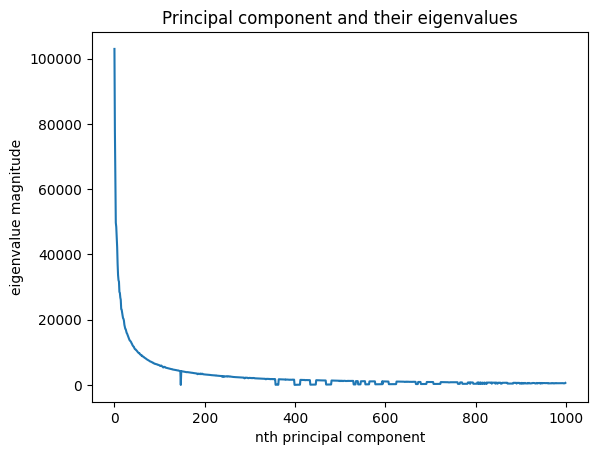

In [ ]:
plt.plot(np.abs(w))

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

**Plotting the projections of each points in Top 2 components of the Eigenvectors**

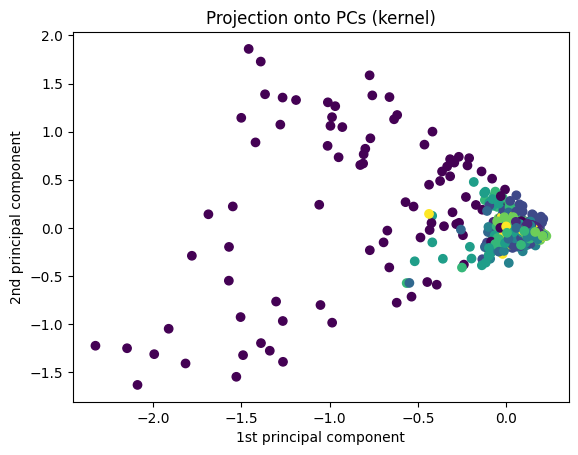

In [ ]:
plt.scatter(data_reconst_mat[:,0],data_reconst_mat[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

kernel PCA for n = 3

In [ ]:
ker_mat_3 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_3[i,j] = (np.dot(x[:,i], x[:,j]) + 1)**3


In [ ]:
ker_mat_cen_3 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_3[i,j] = ker_mat_3[i,j] - (np.sum(ker_mat_3[i,:])/n) - (np.sum(ker_mat_3[:,j])/n) + (np.sum(ker_mat_3)/n**2)

In [ ]:
w_3,v_beta_3 = eig(ker_mat_cen_3)
v_alpha_3 = np.zeros((1000,1000))
for i in range(1000):
  v_alpha_3[:,i] = v_beta_3[:,i]/np.sqrt(1000*(np.abs(w_3[i])))

In [ ]:
np.sum(w_3[0:800])/np.sum(w_3)

0.9446354668183122

In [ ]:
data_reconst_mat_3 = np.matmul(ker_mat_cen_3,v_alpha_3)

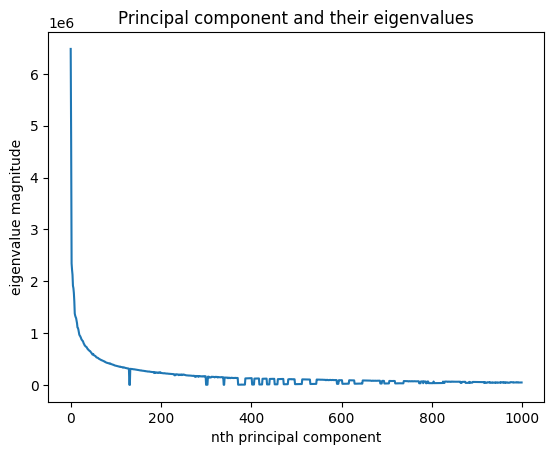

In [ ]:
plt.plot(w_3)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

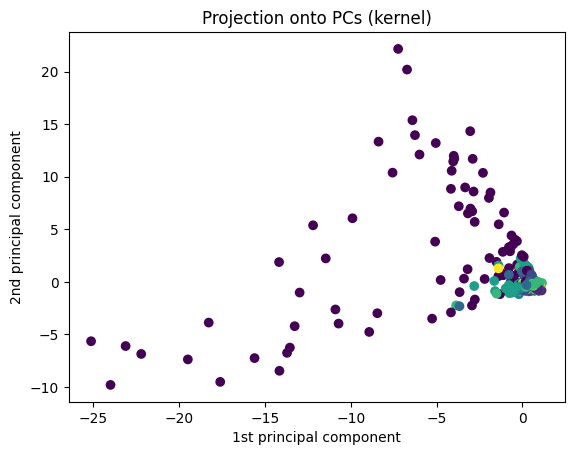

In [ ]:
plt.scatter(data_reconst_mat_3[:,0],data_reconst_mat_3[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
np.sum(w_3[0:2])/np.sum(w_3)

0.06260195014993103

Kernel PCA for n = 4

In [ ]:
ker_mat_4 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_4[i,j] = (np.dot(x[:,i], x[:,j]) + 1)**4


In [ ]:
ker_mat_cen_4 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_4[i,j] = ker_mat_4[i,j] - (np.sum(ker_mat_4[i,:])/n) - (np.sum(ker_mat_4[:,j])/n) + (np.sum(ker_mat_4)/n**2)

In [ ]:
w_4,v_beta_4 = eig(ker_mat_cen_4)
v_alpha_4 = np.zeros((1000,1000))
for i in range(1000):
  v_alpha_4[:,i] = v_beta_4[:,i]/np.sqrt(1000*(np.abs(w_4[i])))

In [ ]:
np.sum(w_4[0:800])/np.sum(w_4)

0.9584535877195577

In [ ]:
data_reconst_mat_4 = np.matmul(np.transpose(v_alpha_4),ker_mat_cen_4)

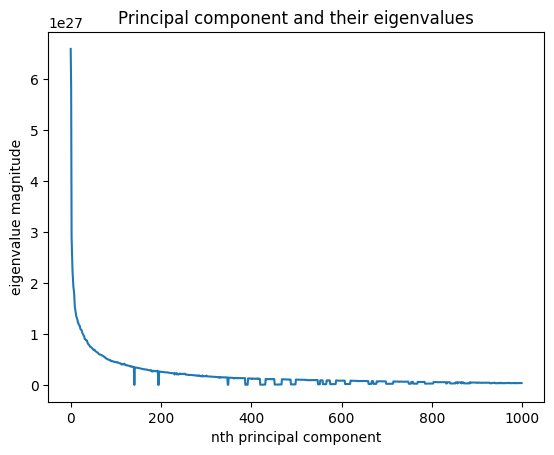

In [ ]:
plt.plot(w_4)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

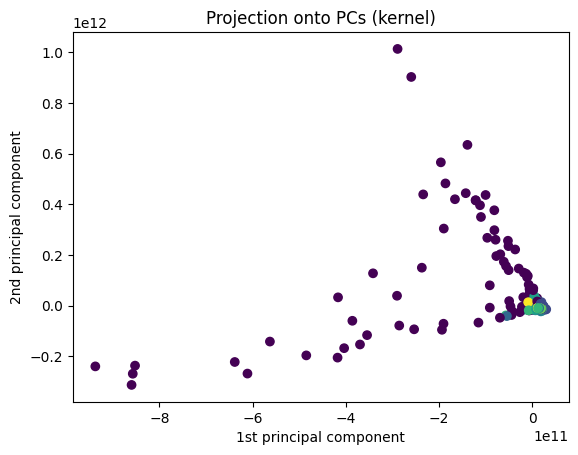

In [ ]:
plt.scatter(data_reconst_mat_4[0,:],data_reconst_mat_4[1,:],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

kernel matrix for Radial Basis, for alpha = 0.1

In [ ]:
sigma = 0.1

In [ ]:
ker_mat_e1 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e1[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))

In [ ]:
ker_mat_cen_e1 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e1[i,j] = ker_mat_e1[i,j] - (np.sum(ker_mat_e1[i,:])/n) - (np.sum(ker_mat_e1[:,j])/n) + (np.sum(ker_mat_e1)/n**2)

In [ ]:
w_e1,v_beta_e1 = eig(ker_mat_cen_e1)
w_e1=np.abs(w_e1)
v_alpha_e1 = np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e1[:,i] = v_beta_e1[:,i]/np.sqrt(1000*(np.abs(w_e1[i])))

<ipython-input-56-0a2f51cba936>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e1[:,i] = v_beta_e1[:,i]/np.sqrt(1000*(np.abs(w_e1[i])))


In [ ]:
w_e1

In [ ]:
np.sum(w_e1[0:800])/np.sum(w_e1)

0.7997997997997999

In [ ]:
data_reconst_mat_e1 = np.matmul(ker_mat_cen_e1,v_alpha_e1)

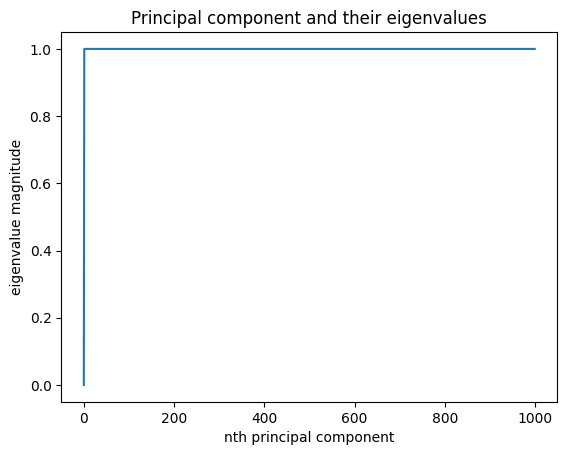

In [ ]:
plt.plot(w_e1)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

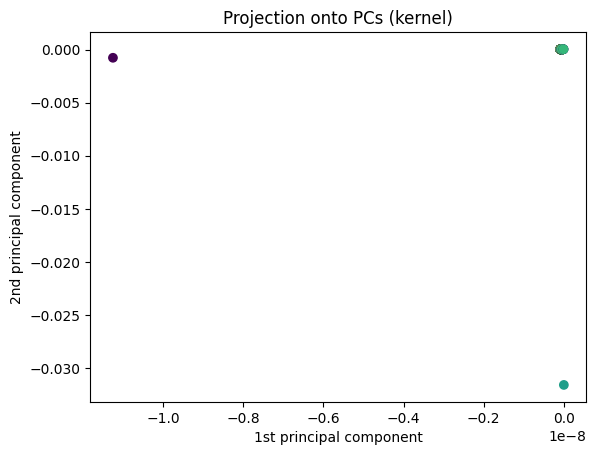

In [ ]:
plt.scatter(data_reconst_mat_e1[:,0],data_reconst_mat_e1[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

kernel matrix for Radial Basis, for alpha = 0.2

In [ ]:
sigma = 0.2

In [ ]:
ker_mat_e2 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e2[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))

In [ ]:
ker_mat_cen_e2 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e2[i,j] = ker_mat_e2[i,j] - (np.sum(ker_mat_e2[i,:])/n) - (np.sum(ker_mat_e2[:,j])/n) + (np.sum(ker_mat_e2)/n**2)

In [ ]:
w_e2,v_beta_e2 = eig(ker_mat_cen_e2)
w_e2=np.abs(w_e2)
v_alpha_e2= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e2[:,i] = v_beta_e2[:,i]/np.sqrt(1000*(np.abs(w_e2[i])))

<ipython-input-9-3ff24eb65baf>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e2[:,i] = v_beta_e2[:,i]/np.sqrt(1000*(np.abs(w_e2[i])))


In [ ]:
np.sum(w_e2[0:500])/np.sum(w_e2)

0.49949949949946665

In [ ]:
data_reconst_mat_e2 = np.matmul(ker_mat_cen_e2,v_alpha_e2)

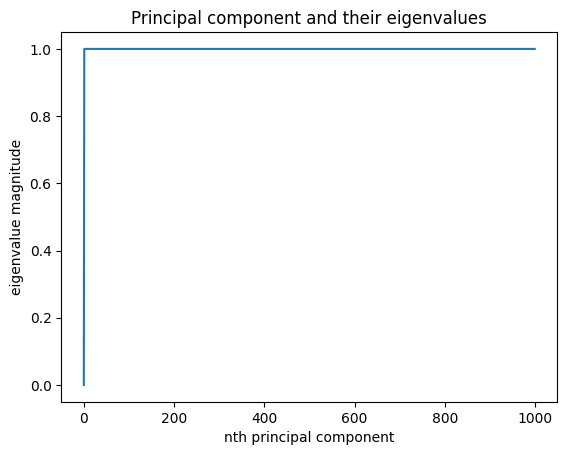

In [ ]:
plt.plot(w_e2)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

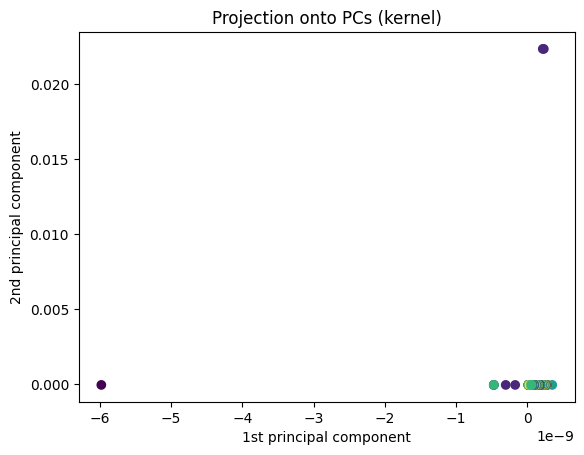

In [ ]:
plt.scatter(data_reconst_mat_e2[:,0],data_reconst_mat_e2[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

kernel matrix for Radial Basis, for alpha = 0.3

In [ ]:
sigma = 0.3
ker_mat_e3 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e3[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e3 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e3[i,j] = ker_mat_e3[i,j] - (np.sum(ker_mat_e3[i,:])/n) - (np.sum(ker_mat_e3[:,j])/n) + (np.sum(ker_mat_e3)/n**2)


w_e3,v_beta_e3 = eig(ker_mat_cen_e3)
w_e3=np.abs(w_e3)
v_alpha_e3= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e3[:,i] = v_beta_e3[:,i]/np.sqrt(1000*(np.abs(w_e3[i])))

data_reconst_mat_e3 = np.matmul(ker_mat_cen_e3,v_alpha_e3)

<ipython-input-15-711cab09c47d>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e3[:,i] = v_beta_e3[:,i]/np.sqrt(1000*(np.abs(w_e3[i])))


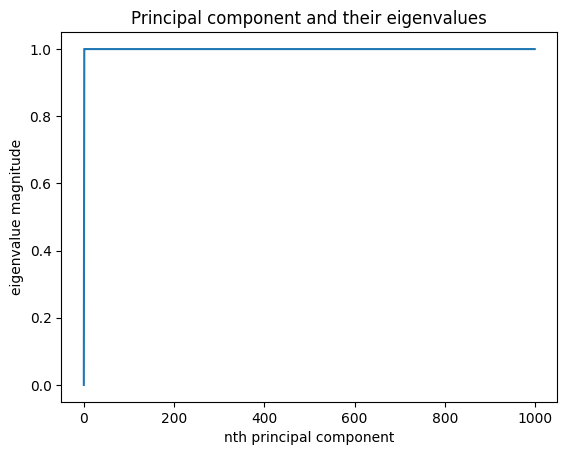

In [ ]:
plt.plot(w_e3)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

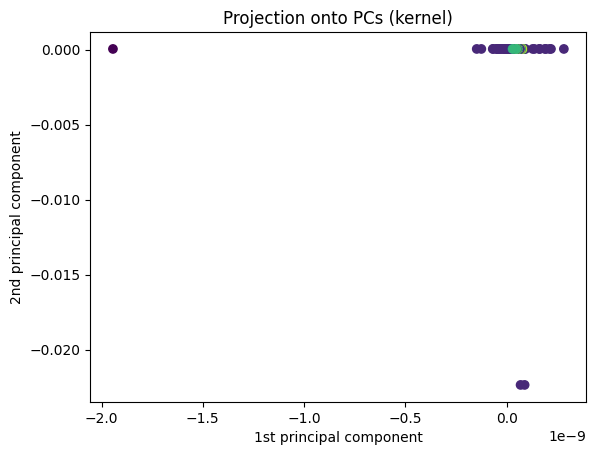

In [ ]:
plt.scatter(data_reconst_mat_e3[:,0],data_reconst_mat_e3[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()



kernel matrix for Radial Basis, for alpha = 0.4

In [ ]:
sigma = 0.4
ker_mat_e4 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e4[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e4 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e4[i,j] = ker_mat_e4[i,j] - (np.sum(ker_mat_e4[i,:])/n) - (np.sum(ker_mat_e4[:,j])/n) + (np.sum(ker_mat_e4)/n**2)


w_e4,v_beta_e4 = eig(ker_mat_cen_e4)
w_e4=np.abs(w_e4)
v_alpha_e4= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e4[:,i] = v_beta_e4[:,i]/np.sqrt(1000*(np.abs(w_e4[i])))

data_reconst_mat_e4 = np.matmul(ker_mat_cen_e4,v_alpha_e4)

<ipython-input-19-3bd3d97f973c>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e4[:,i] = v_beta_e4[:,i]/np.sqrt(1000*(np.abs(w_e4[i])))


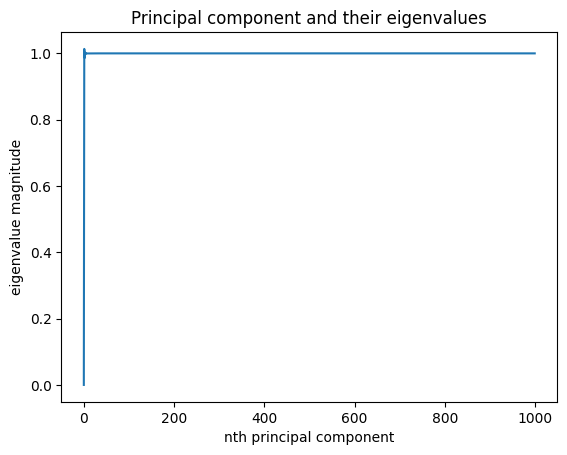

In [ ]:
plt.plot(w_e4)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

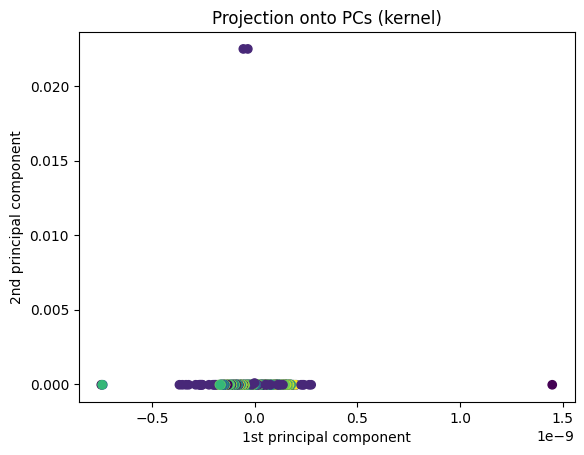

In [ ]:
plt.scatter(data_reconst_mat_e4[:,0],data_reconst_mat_e4[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

kernel matrix for Radial Basis, for alpha = 0.5

In [ ]:
sigma = 0.5

In [ ]:
ker_mat_e5 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e5[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))

In [ ]:
ker_mat_cen_e5 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e5[i,j] = ker_mat_e5[i,j] - (np.sum(ker_mat_e5[i,:])/n) - (np.sum(ker_mat_e5[:,j])/n) + (np.sum(ker_mat_e5)/n**2)

In [ ]:
w_e5,v_beta_e5 = eig(ker_mat_cen_e5)
w_e5=np.abs(w_e5)
v_alpha_e5= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e5[:,i] = v_beta_e5[:,i]/np.sqrt(1000*(np.abs(w_e5[i])))

<ipython-input-46-bdf45dda9070>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e5[:,i] = v_beta_e5[:,i]/np.sqrt(1000*(np.abs(w_e5[i])))


In [ ]:
np.sum(w_e5[0:500])/np.sum(w_e5)

0.49949937942756034

In [ ]:
data_reconst_mat_e5 = np.matmul(ker_mat_cen_e5,v_alpha_e5)

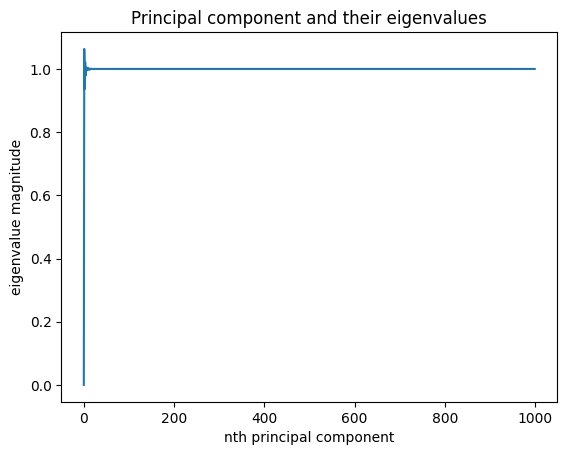

In [ ]:
plt.plot(w_e5)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

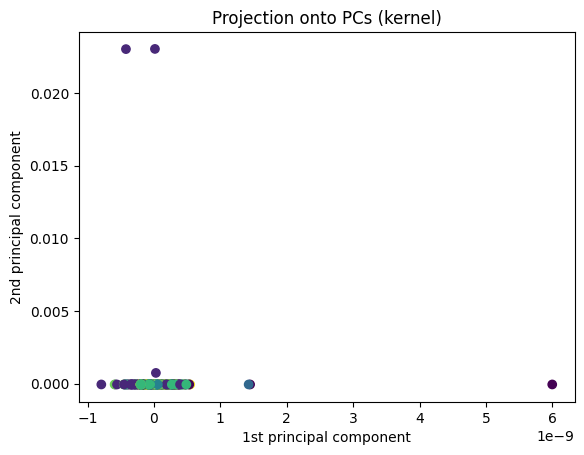

In [ ]:
plt.scatter(data_reconst_mat_e5[:,0],data_reconst_mat_e5[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

Kernel matrix for Radial Basis, for alpha = 0.6

In [ ]:
sigma = 0.6
ker_mat_e6 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e6[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e6 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e6[i,j] = ker_mat_e6[i,j] - (np.sum(ker_mat_e6[i,:])/n) - (np.sum(ker_mat_e6[:,j])/n) + (np.sum(ker_mat_e6)/n**2)


w_e6,v_beta_e6 = eig(ker_mat_cen_e6)
w_e6=np.abs(w_e6)
v_alpha_e6= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e6[:,i] = v_beta_e6[:,i]/np.sqrt(1000*(np.abs(w_e6[i])))

data_reconst_mat_e6 = np.matmul(ker_mat_cen_e6,v_alpha_e6)

<ipython-input-22-2c9aba546b76>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e6[:,i] = v_beta_e6[:,i]/np.sqrt(1000*(np.abs(w_e6[i])))


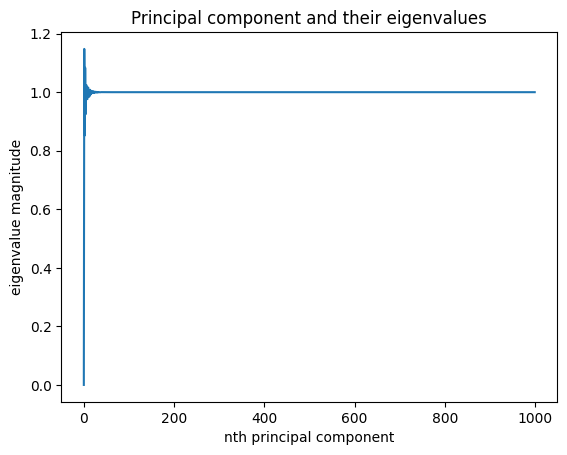

In [ ]:
plt.plot(w_e6)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

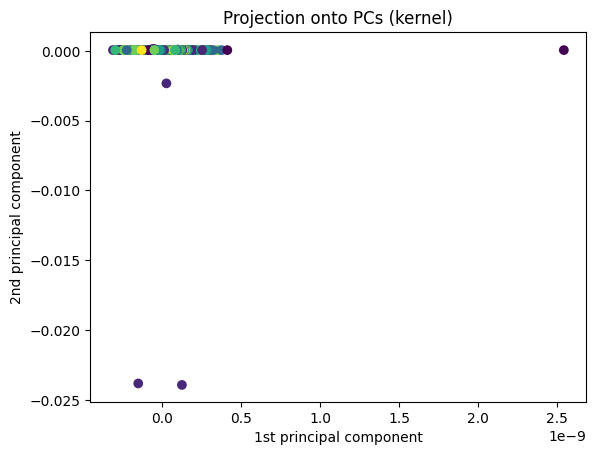

In [ ]:
plt.scatter(data_reconst_mat_e6[:,0],data_reconst_mat_e6[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
sigma = 0.7
ker_mat_e7 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e7[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e7 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e7[i,j] = ker_mat_e7[i,j] - (np.sum(ker_mat_e7[i,:])/n) - (np.sum(ker_mat_e7[:,j])/n) + (np.sum(ker_mat_e7)/n**2)


w_e7,v_beta_e7 = eig(ker_mat_cen_e7)
w_e7=np.abs(w_e7)
v_alpha_e7= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e7[:,i] = v_beta_e7[:,i]/np.sqrt(1000*(np.abs(w_e7[i])))

data_reconst_mat_e7 = np.matmul(ker_mat_cen_e7,v_alpha_e7)

<ipython-input-26-7a9857a2e644>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  v_alpha_e7[:,i] = v_beta_e7[:,i]/np.sqrt(1000*(np.abs(w_e7[i])))


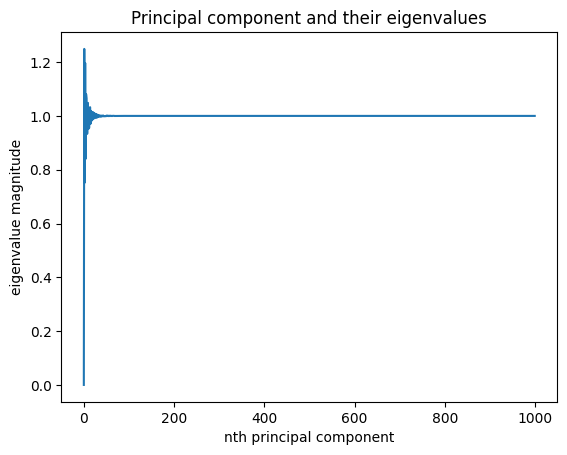

In [ ]:
plt.plot(w_e7)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

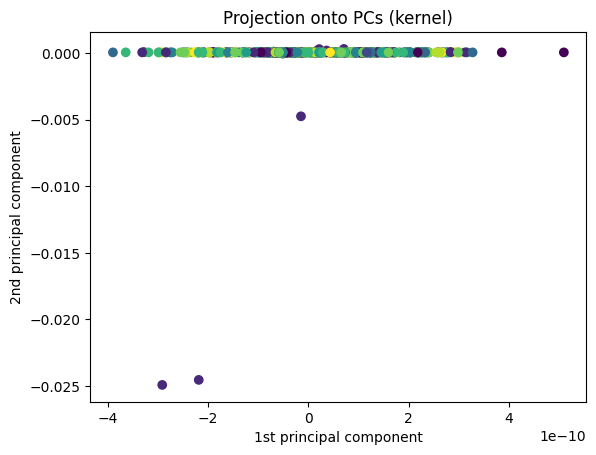

In [ ]:
plt.scatter(data_reconst_mat_e7[:,0],data_reconst_mat_e7[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
sigma = 0.8
ker_mat_e8 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e8[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e8 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e8[i,j] = ker_mat_e8[i,j] - (np.sum(ker_mat_e8[i,:])/n) - (np.sum(ker_mat_e8[:,j])/n) + (np.sum(ker_mat_e8)/n**2)


w_e8,v_beta_e8 = eig(ker_mat_cen_e8)
w_e8=np.abs(w_e8)
v_alpha_e8= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e8[:,i] = v_beta_e8[:,i]/np.sqrt(1000*(np.abs(w_e8[i])))

data_reconst_mat_e8 = np.matmul(ker_mat_cen_e8,v_alpha_e8)


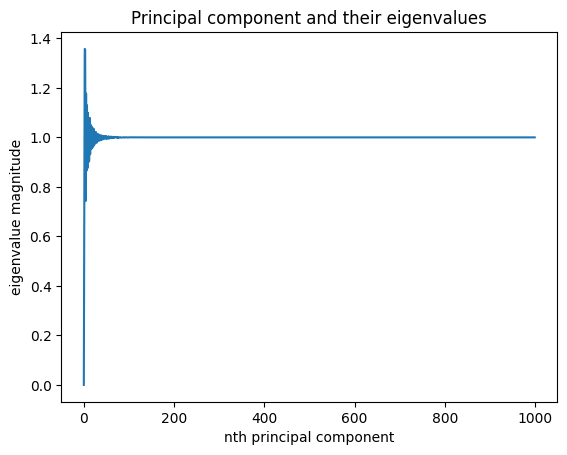

In [ ]:
plt.plot(w_e8)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

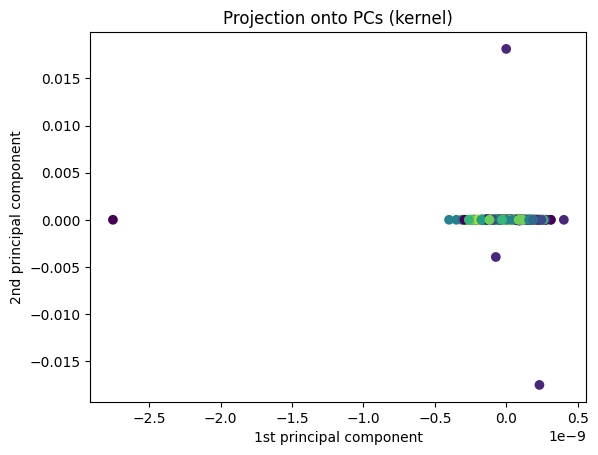

In [ ]:
plt.scatter(data_reconst_mat_e8[:,0],data_reconst_mat_e8[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
sigma = 0.9
ker_mat_e9 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e9[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e9 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e9[i,j] = ker_mat_e9[i,j] - (np.sum(ker_mat_e9[i,:])/n) - (np.sum(ker_mat_e9[:,j])/n) + (np.sum(ker_mat_e9)/n**2)


w_e9,v_beta_e9 = eig(ker_mat_cen_e9)
w_e9=np.abs(w_e9)
v_alpha_e9= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e9[:,i] = v_beta_e9[:,i]/np.sqrt(1000*(np.abs(w_e9[i])))

data_reconst_mat_e9 = np.matmul(ker_mat_cen_e9,v_alpha_e9)

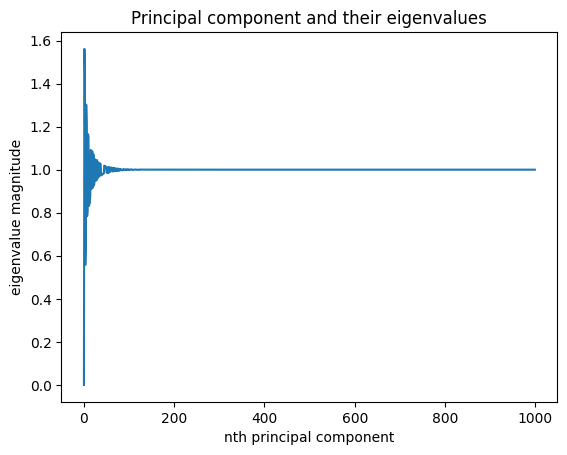

In [ ]:
plt.plot(w_e9)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

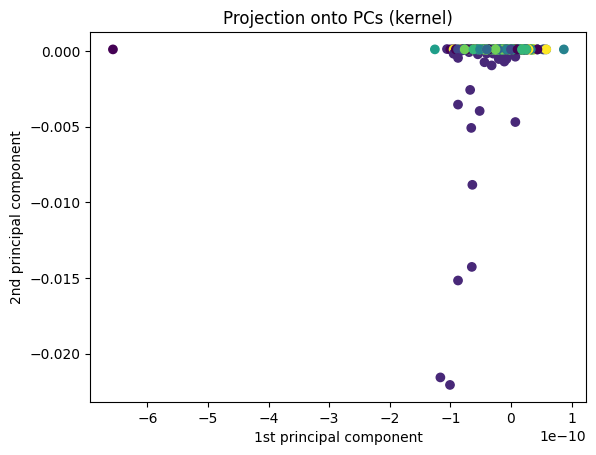

In [ ]:
plt.scatter(data_reconst_mat_e9[:,0],data_reconst_mat_e9[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
sigma = 1
ker_mat_e10 = np.zeros((1000,1000))
for i in range(1000):
  for j in range(1000):
    ker_mat_e10[i,j] = np.exp(-1*(np.dot(x[:,i]- x[:,j],x[:,i]- x[:,j]))/(2*(sigma**2)))
ker_mat_cen_e10 = np.zeros((1000,1000))
n = 1000
for i in range(1000):
  for j in range(1000):
    ker_mat_cen_e10[i,j] = ker_mat_e10[i,j] - (np.sum(ker_mat_e10[i,:])/n) - (np.sum(ker_mat_e10[:,j])/n) + (np.sum(ker_mat_e10)/n**2)


w_e10,v_beta_e10 = eig(ker_mat_cen_e10)
w_e10=np.abs(w_e10)
v_alpha_e10= np.zeros((1000,1000))
for i in range(1000):
  v_alpha_e10[:,i] = v_beta_e10[:,i]/np.sqrt(1000*(np.abs(w_e10[i])))

data_reconst_mat_e10 = np.matmul(ker_mat_cen_e10,v_alpha_e10)

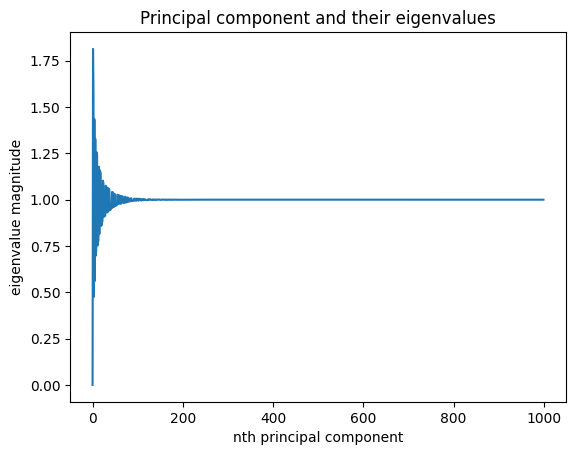

In [ ]:
plt.plot(w_e10)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

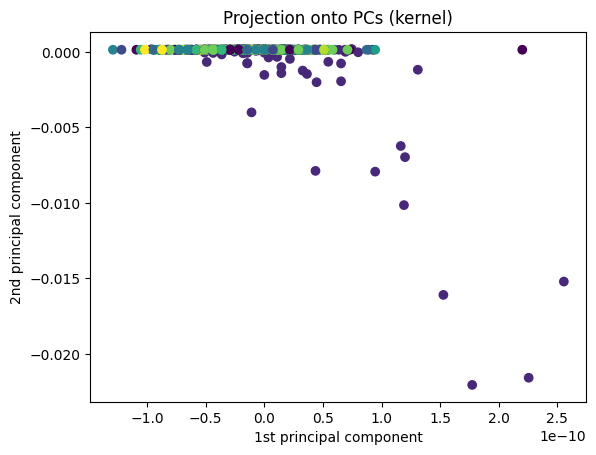

In [ ]:
plt.scatter(data_reconst_mat_e10[:,0],data_reconst_mat_e10[:,1],c =y_train[0:1000] ,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()